In [3]:
import pandas as pd 

df = pd.read_csv("particulate.csv")

print(df.columns)

Index(['idStudy', 'idIstat', 'Province', 'itCode', 'Exceedances',
       'StationsNum', 'Cases', 'Population', 'Density', 'Long', 'Lat', 'Where',
       'Commuters', 'CommutersDensity', 'ExcedRatio25'],
      dtype='object')


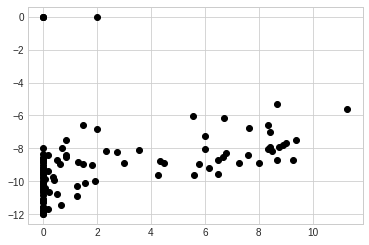

In [28]:
import matplotlib.pyplot as plt
import numpy as np 

plt.style.use('seaborn-whitegrid')

x = (df["Exceedances"].values/df["StationsNum"].values)
y = np.log(df["Cases"].values/(df["Population"].values))

y = np.nan_to_num(y, copy=True, nan=0.0, posinf=0.0, neginf=0.0)
x = np.nan_to_num(x, copy=True, nan=0.0, posinf=0.0, neginf=0.0)

plt.plot(x, y, 'o', color='black');

0.22556397348343382
Feature: 0, Score: 0.12753
Feature: 1, Score: 0.12007
Feature: 2, Score: -0.00041


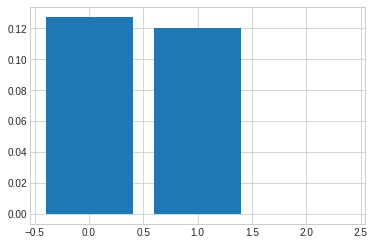

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#from sklearn.datasets import make_regression
#X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

cd = df["CommutersDensity"].values
dens = df["Density"].values
X = np.array([x, cd, dens]).T
#print(X)

model = LinearRegression()
# fit the model
model.fit(X, y)

r2 = r2_score(y, model.predict(X))
print(r2)

importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()
